## Introduction to Ensembling in Python

1. [Load Dataset](#1)

2. [Predictive Modeling](#2)

3. [Cross-validation](#3)

4. [Hyper-Parameters Tuning](#4)

5. [Ensembling](#5)

6. [Feature Importance](#6)

## <a name="1">Load Dataset</a>

In [1]:
import pandas as pd

df=pd.read_csv("data/new_data.csv")

## <a name="2">Predictive Modeling</a>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
X=df.drop("Survived",1)
y=df["Survived"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0,stratify=df["Survived"])

In [13]:
abc=[]
classifiers=["Linear SVM","Radial SVM","Logistic Regression","Naive Bayes","k-nearest neighbors","Decision Tree","Random Forest"]
models=[svm.SVC(kernel="linear"),svm.SVC(kernel="rbf"),LogisticRegression(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    abc.append(accuracy_score(y_test,y_pred))
models_df=pd.DataFrame(abc,index=classifiers)
models_df.columns=["Accuracy"]
models_df

,Accuracy
Linear SVM,0.838384
Radial SVM,0.855219
Logistic Regression,0.851852
Naive Bayes,0.801347
k-nearest neighbors,0.784512
Decision Tree,0.835017
Random Forest,0.845118


The accuracy of a model is not the only factor that determines the robustness of the classifier.

Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.  
This seems to be a very good accuracy for a classifier, but we can't confirm that it will be 90% for all the new observations. Because we can't determine which instances the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.

To overcome this and get a generalized model, we use Cross Validation.

## <a name="3">Cross-validation</a>

When the data is imbalanced, there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1. The K-Fold Cross-validation works by dividing the dataset into k-subsets
2. Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts
3. We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm
4. An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model

In [6]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict

kfold=KFold(n_splits=10,random_state=22)
abc=[]
accuracy=[]
std=[]
classifiers=["Linear SVM","Radial SVM","Logistic Regression","Naive Bayes","k-nearest neighbors","Decision Tree","Random Forest"]
models=[svm.SVC(kernel="linear"),svm.SVC(kernel="rbf"),LogisticRegression(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for model in models:
    cv_result=cross_val_score(model,X,y,cv=kfold,scoring="accuracy")
    abc.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_df=pd.DataFrame({"CV Mean":abc,"Std":std},index=classifiers)
new_models_df

,CV Mean,Std
Linear SVM,0.812547,0.031519
Radial SVM,0.837241,0.023822
Logistic Regression,0.831673,0.021103
Naive Bayes,0.782310,0.042432
k-nearest neighbors,0.817091,0.025374
Decision Tree,0.821586,0.028343
Random Forest,0.830512,0.034680


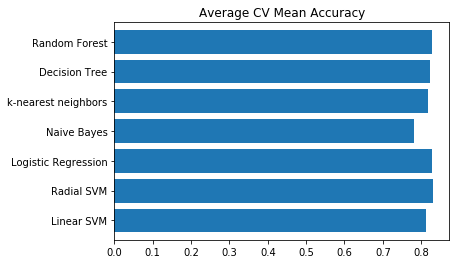

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

new_models_df["CV Mean"].plot.barh(width=0.8)
plt.title("Average CV Mean Accuracy")
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

It gives the number of correct and incorrect classifications made by the classifier.

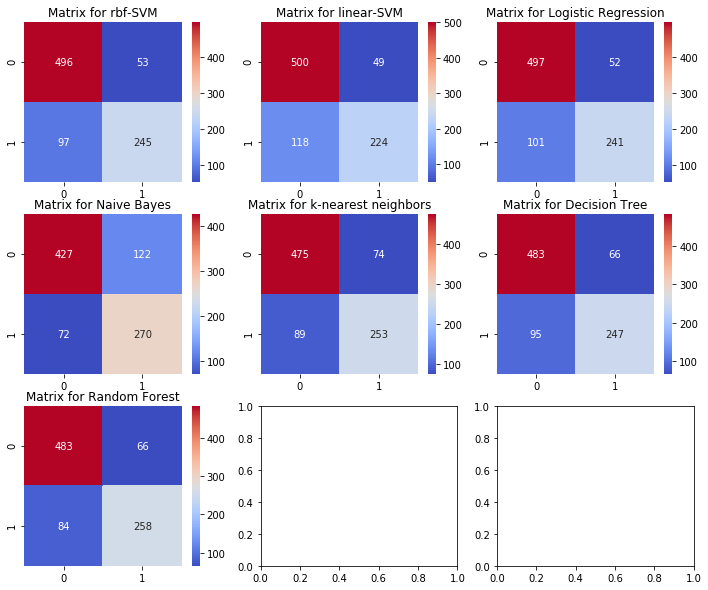

In [29]:
from sklearn.metrics import confusion_matrix

f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred=cross_val_predict(svm.SVC(kernel="rbf"),X,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,cmap="coolwarm",fmt="g")
ax[0,0].set_title("Matrix for rbf-SVM")
y_pred=cross_val_predict(svm.SVC(kernel="linear"),X,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,cmap="coolwarm",fmt="g")
ax[0,1].set_title("Matrix for linear-SVM")
y_pred=cross_val_predict(LogisticRegression(),X,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,cmap="coolwarm",fmt="g")
ax[0,2].set_title("Matrix for Logistic Regression")
y_pred=cross_val_predict(GaussianNB(),X,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,cmap="coolwarm",fmt="g")
ax[1,0].set_title("Matrix for Naive Bayes")
y_pred=cross_val_predict(KNeighborsClassifier(),X,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,cmap="coolwarm",fmt="g")
ax[1,1].set_title("Matrix for k-nearest neighbors")
y_pred=cross_val_predict(DecisionTreeClassifier(),X,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,cmap="coolwarm",fmt="g")
ax[1,2].set_title("Matrix for Decision Tree")
y_pred=cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,cmap="coolwarm",fmt="g")
ax[2,0].set_title("Matrix for Random Forest")
plt.show()

**Interpreting Confusion Matrix**: The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made.

Let's consider the first plot for rbf-SVM:
- The no. of correct predictions are 496(for dead) + 245(for survived) with the mean CV accuracy being (496+245)/891 = 83.1% which we did get earlier
- Errors -> Wrongly Classified 53 dead people as survived and 97 survived as dead

By looking at all the matrices, we can say that linear-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

## <a name="4">Hyper-Parameters Tuning</a>

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and Random Forest.

**SVM**

In [30]:
from sklearn.model_selection import GridSearchCV

C=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=["rbf","linear"]
param_grid={"kernel":kernel,"C":C,"gamma":gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=param_grid,verbose=True,n_jobs=-1)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.0s


0.8406126420187057
SVC(C=0.7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=-1)]: Done 1092 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:   18.0s finished


**Random Forest**

In [8]:
n_estimators=range(100,1000,100)
param_grid={"n_estimators":n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=param_grid,verbose=True,n_jobs=-1)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    9.6s finished


0.8338945005611673
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


The best score for rbf-SVM is 84.06% with C=0.7 and gamma=0.2. For Random Forest, score is about 82.7% with n_estimators=200.

In [ ]:
"""from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from IPython.display import Image

clf=gd.best_estimator_

# Let's extract a single tree
estimator=clf.estimators_[5]

dot_data=tree.export_graphviz(estimator,out_file=None,feature_names=X.columns)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())"""

## <a name="5">Ensembling</a>

Ensembling is a good way to increase the performance of a model. In other words, it's the combination of various simple models to create a single powerful model.

Ensembling can be done in ways like:
- Voting Classifier
- Bagging
- Boosting

**Voting Classifier**

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the base models.

In [80]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf=VotingClassifier(estimators=[("KNN",KNeighborsClassifier(n_neighbors=3)),
                                             ("RBF",svm.SVC(probability=True,kernel="rbf",C=0.5,gamma=0.1)),
                                             ("RFor",RandomForestClassifier(n_estimators=500,random_state=0)),
                                             ("LR",LogisticRegression(C=0.05)),
                                             ("DT",DecisionTreeClassifier(random_state=0)),
                                             ("NB",GaussianNB()),
                                             ("LIN",svm.SVC(kernel="linear",probability=True))],voting="soft").fit(X_train,y_train)

print("The accuracy for ensembled model is {}".format(ensemble_lin_rbf.score(X_test,y_test)))
result=cross_val_score(ensemble_lin_rbf,X,y,cv=kfold,scoring="accuracy")
print("The cross validated score is {}".format(result.mean()))

The accuracy for ensembled model is 0.8484848484848485
The cross validated score is 0.827191011235955


**Bagging**

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions.

**Bagged KNN**

In [78]:
from sklearn.ensemble import BaggingClassifier

clf=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("The accuracy for bagged KNN is {}".format(accuracy_score(y_test,y_pred)))
result=cross_val_score(clf,X,y,cv=kfold,scoring="accuracy")
print("The cross validated score for bagged KNN is {}".format(result.mean()))

The accuracy for bagged KNN is 0.8316498316498316
The cross validated score for bagged KNN is 0.8148813982521848


**Bagged Decision Tree**

In [79]:
clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=700)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("The accuracy for bagged Decision Tree is {}".format(accuracy_score(y_test,y_pred)))
result=cross_val_score(clf,X,y,cv=kfold,scoring="accuracy")
print("The cross validated score for bagged Decision Tree is {}".format(result.mean()))

The accuracy for bagged Decision Tree is 0.8518518518518519
The cross validated score for bagged Decision Tree is 0.826067415730337


**Boosting**

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.

Boosting works as follows:  
A model is first trained on the complete dataset. Now the model will get some instances right and some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly, and new classifiers are added to the model until the limit is reached on the accuracy.

**AdaBoost (Adaptive Boosting)**

In [30]:
from sklearn.ensemble import AdaBoostClassifier

clf=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(clf,X,y,cv=kfold,scoring="accuracy")
print("The cross validated score for AdaBoost is: {}".format(result.mean()))

The cross validated score for AdaBoost is: 0.8148439450686642


**XGBoost**

In [18]:
import xgboost as xg

clf=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(clf,X,y,cv=kfold,scoring="accuracy")
print("The cross validated score for XGBoost is: {}".format(result.mean()))

The cross validated score for XGBoost is: 0.830561797752809


**Hyper-Parameters Tuning for AdaBoost**

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid={"n_estimators":list(range(100,1100,100)),"learning_rate":[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=param_grid,verbose=True,n_jobs=-1)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.2min finished


0.8204444165463564
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)


The maximum accuracy we can get with AdaBoost is 82.04% with n_estimators=200 and learning_rate=0.05

**Confusion Matrix for the best model**

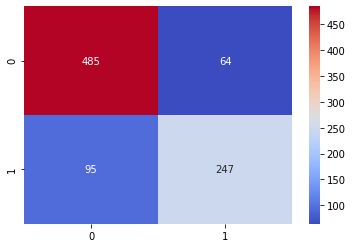

In [77]:
clf=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(clf,X,y,cv=kfold)
sns.heatmap(confusion_matrix(y,result),annot=True,cmap="coolwarm",fmt="g")
plt.show()

## <a name="6">Feature Importance</a>

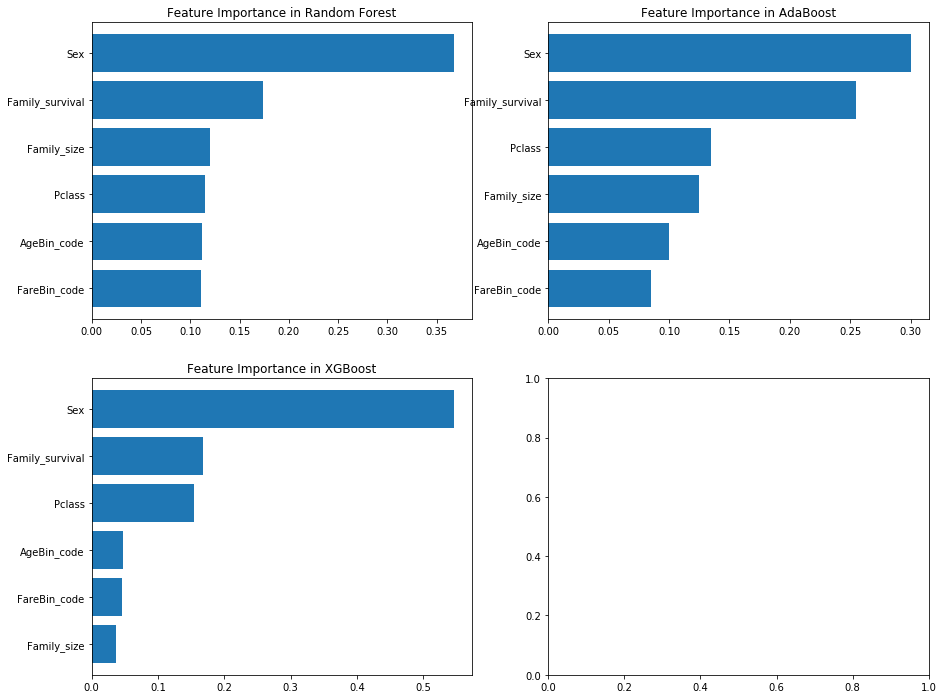

In [23]:
f,ax=plt.subplots(2,2,figsize=(15,12))
clf=RandomForestClassifier(n_estimators=500,random_state=0)
clf.fit(X,y)
pd.Series(clf.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forest')
clf=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
clf.fit(X,y)
pd.Series(clf.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1])
ax[0,1].set_title('Feature Importance in AdaBoost')
clf=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
clf.fit(X,y)
pd.Series(clf.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0])
ax[1,0].set_title('Feature Importance in XGBoost')
plt.show()